In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

In [2]:
data=pd.read_csv('RealEstate.csv')

In [3]:
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


<AxesSubplot:xlabel='size', ylabel='price'>

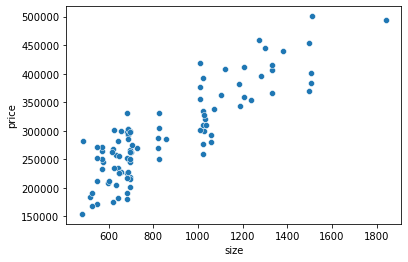

In [4]:
sns.scatterplot(x='size',y='price',data=data)

<AxesSubplot:xlabel='size', ylabel='price'>

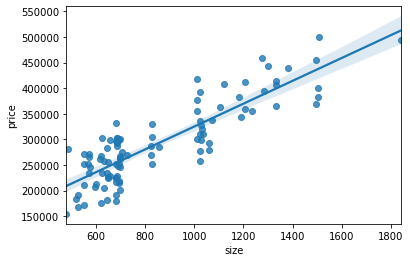

In [5]:
sns.regplot(x='size',y='price',data=data)

In [6]:
x1=data[['size','year']]

In [7]:
y=data.price

In [8]:
x=sm.add_constant(x1)

In [9]:
result=sm.OLS(y,x)
result.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.77e-32
Time:                        18:36:30   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
def predictprice():
    size=float(input('Enter the size of the house: '))
    year=int(input('Enter the year in which the house was constructed: '))        
    price=(227.7009*size)+(2916.7853*year)+(-5.772e+06)
    price=round(price,ndigits=2)
    print('The estimated price of the house would be:',price)


In [11]:
predictprice()

Enter the size of the house: 300
Enter the year in which the house was constructed: 2019
The estimated price of the house would be: 185299.79


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg=LinearRegression()

In [14]:
reg.fit(x1,y)

LinearRegression()

In [15]:
reg.predict([[643,2015]])

array([251467.06524217])

In [16]:
reg.coef_

array([ 227.70085401, 2916.78532684])

In [17]:
reg.score

<bound method RegressorMixin.score of LinearRegression()>

In [18]:
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [38]:
predictions=[]
for i in reg.predict(x1):
    i=round(i,ndigits=2)
    predictions.append(i)
    np.array(predictions)
    

In [48]:
dataframe=list(zip(round(data.price,ndigits=2),predictions))

In [64]:
analysis=pd.DataFrame(data=dataframe,columns=['Actual Price','Predicted Price'])
data['SL no.']=range(1,len(data)+1)

In [65]:
data.index=data['SL no.']

In [66]:
data.drop('SL no.',axis=1,inplace=True)

In [67]:
data

,price,size,year
SL no.,,,
1,234314.144,643.09,2015
2,228581.528,656.22,2009
3,281626.336,487.29,2018
4,401255.608,1504.75,2015
5,458674.256,1275.46,2009
...,...,...,...
96,252460.400,549.80,2009
97,310522.592,1037.44,2009
98,383635.568,1504.75,2006


In [68]:
analysis

,Actual Price,Predicted Price
0,234314.14,251487.56
1,228581.53,236976.56
2,281626.34,224762.12
3,401255.61,447688.28
4,458674.26,377978.04
...,...,...
95,252460.40,212744.63
96,310522.59,323780.68
97,383635.57,421437.21
98,225145.25,252671.60


<AxesSubplot:xlabel='Actual Price', ylabel='Density'>

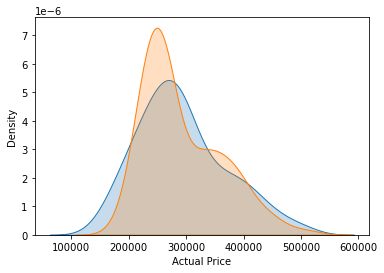

In [75]:
sns.kdeplot(data=analysis['Actual Price'],shade=True)
sns.kdeplot(data=analysis['Predicted Price'],shade=True)

In [80]:
residuals=-(analysis['Actual Price']-analysis['Predicted Price'])

<AxesSubplot:ylabel='Density'>

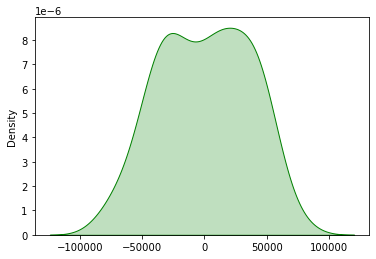

In [85]:
sns.kdeplot(residuals,shade=True,color='g')